# Introduzione a Pandas

Pandas offre molte funzionalità e l'introduzione di oggi è proprio questo: una semplice introduzione.

A cosa serve?
* progettato per __manipolare__ e __analizzare__ i dati in modo veloce e semplice
* utilizza uno stile idiomatico simile a numpy
* __numpy__ funziona al meglio con dati _array_ numerici _omogenei_, mentre __pandas__ è stato progettato per dati _tabellari_ ed _eterogenei_.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Pandas Data Structures

## Series
- unidimensionale, simile a un array
- contiene una sequenza di valori e un array associato di etichette di dati
- versione più potente di un dizionario

In [3]:
s1 = np.array([1,9,2,3])
print(s1)

[1 9 2 3]


In [4]:
# creating a series object
s1 = pd.Series([1,9,2,3])
print(s1)

0    1
1    9
2    2
3    3
dtype: int64


In [5]:
print("values: {}".format(s1.values))
print("index: {}".format(s1.index))

values: [1 9 2 3]
index: RangeIndex(start=0, stop=4, step=1)


In [6]:
# Creating a series object with a non-integer index
# nb: this index is explicit, if you don't specify it's called implicit index
s2 = pd.Series([1,9,2,3], index=['d','a','c','b'])
print(s2)
print("values: {}".format(s2.values))
print("index: {}".format(s2.index))

d    1
a    9
c    2
b    3
dtype: int64
values: [1 9 2 3]
index: Index(['d', 'a', 'c', 'b'], dtype='object')


In [7]:
# or creating a series object with a non-integer index from a dictionary
dict_data = {'Star Wars': 8, 'Star Trek': 13, 'Matrix': 3, 'Blade Runner':2}
s3 = pd.Series(dict_data)
print(s3)

Star Wars        8
Star Trek       13
Matrix           3
Blade Runner     2
dtype: int64


In [8]:
# selecting single values
s1[0]

1

In [9]:
# selecting a set of values
s2[1:3]

a    9
c    2
dtype: int64

In [10]:
# selecting a set of values
s2[['a','b','c']]

a    9
b    3
c    2
dtype: int64

In [11]:
# indices are automatically aligned in arithmetic operations
# null values are inserted if an index is missing in one of the series
s3 = pd.Series([12,4,5,7], index=['b','c','d','e'])
print(s2)
print(s3)
print(s2+s3)

d    1
a    9
c    2
b    3
dtype: int64
b    12
c     4
d     5
e     7
dtype: int64
a     NaN
b    15.0
c     6.0
d     6.0
e     NaN
dtype: float64


In [12]:
# index can be named
s3.name = 'count'
s3.index.name = 'Movie'
print(s3)

Movie
b    12
c     4
d     5
e     7
Name: count, dtype: int64


### Indexing subtleties

In [13]:
s4 = pd.Series(['one', 'two', 'three'], index=[6, 2, 10])

In [14]:
# simple indexing will use explicit indices, i.e. index=[6, 2, 10]
s4[6]

'one'

In [15]:
# slicing will use the implicit indices,
s4[0:2]

6    one
2    two
dtype: object

To avoid running into trouble with this, pandas provides special functions.
The loc function to do __explict__ indexing

In [16]:
# to use the explicit index
print(s4.loc[6:2])
print(s4.loc[2:6])

6    one
2    two
dtype: object
Series([], dtype: object)


Ma nota: utilizzando lo slicing sull'indice esplicito, il limite superiore è *incluso*, a differenza di quanto avviene di solito in python e numpy!

E poi c'è la funzione iloc per fare l'indicizzazione __implicita__.

In [17]:
s4.iloc[1]

'two'

In [18]:
s4.iloc[1:3]

2       two
10    three
dtype: object

### Numpy-like operations

In [19]:
# selecting with a boolean array - masking
s2[s2>1]

a    9
c    2
b    3
dtype: int64

In [20]:
# scalar multiplication
s2 * 3

d     3
a    27
c     6
b     9
dtype: int64

In [21]:
# numpy functions
np.exp(s2)

d       2.718282
a    8103.083928
c       7.389056
b      20.085537
dtype: float64

# Esercizio:
Crea una Pandas Series contenente 10 numeri interi casuali compresi tra 1 e 100. Successivamente, calcola la media (mean), la deviazione standard (standard deviation) e la somma (sum) della serie. Filtra i valori minori di 50.

In [22]:
s = pd.Series(np.random.randint(1,100,size=10))
s[s<50]

1    21
3    22
6    21
7    24
8    22
dtype: int64

## DataFrame
- tabella di dati
- contiene collezioni ordinate di colonne
- ogni colonna può avere un tipo di dato diverso
- può essere pensato come una collezione di Serie
- ha indice di riga e di colonna
- è un po' come gli array di numpy, ma molto più potente e flessibile.

In [23]:
# create DataFrame from dictionary with multiple entries
data_dict = {'JD': [2458135.5, 2458135.5, 2458135.5, 2458140.5, 2458140.5, 2458140.5, 2458240.5, 2458240.5, 2458240.5],
             'object': ['A1689', 'A1689', 'A2218', 'A1689', 'A1689', 'A2218', 'A1689', 'A370', 'A2218'],
             'band': ['J', 'K', 'J', 'J', 'K', 'J', 'J', 'K', 'J']}
df1 = pd.DataFrame(data_dict)
df1

,JD,object,band
0,2458135.5,A1689,J
1,2458135.5,A1689,K
2,2458135.5,A2218,J
3,2458140.5,A1689,J
4,2458140.5,A1689,K
5,2458140.5,A2218,J
6,2458240.5,A1689,J
7,2458240.5,A370,K
8,2458240.5,A2218,J


In [24]:
df2 = pd.DataFrame(data_dict, index=['one', 'two', 'three','four','five','six','seven','eight','nine'])
df2

,JD,object,band
one,2458135.5,A1689,J
two,2458135.5,A1689,K
three,2458135.5,A2218,J
four,2458140.5,A1689,J
five,2458140.5,A1689,K
six,2458140.5,A2218,J
seven,2458240.5,A1689,J
eight,2458240.5,A370,K
nine,2458240.5,A2218,J


In [25]:
df1['band']

0    J
1    K
2    J
3    J
4    K
5    J
6    J
7    K
8    J
Name: band, dtype: object

In [26]:
df1.columns

Index(['JD', 'object', 'band'], dtype='object')

In [27]:
df1.JD

0    2458135.5
1    2458135.5
2    2458135.5
3    2458140.5
4    2458140.5
5    2458140.5
6    2458240.5
7    2458240.5
8    2458240.5
Name: JD, dtype: float64

In [28]:
# retrieve a row with explicit indexing
df2.loc['four']

JD        2458140.5
object        A1689
band              J
Name: four, dtype: object

In [29]:
# use implicit indexing
df2.iloc[:4,:3]

,JD,object,band
one,2458135.5,A1689,J
two,2458135.5,A1689,K
three,2458135.5,A2218,J
four,2458140.5,A1689,J


In [30]:
# add a column
df2['instrument'] = 'hawki'
df2

,JD,object,band,instrument
one,2458135.5,A1689,J,hawki
two,2458135.5,A1689,K,hawki
three,2458135.5,A2218,J,hawki
four,2458140.5,A1689,J,hawki
five,2458140.5,A1689,K,hawki
six,2458140.5,A2218,J,hawki
seven,2458240.5,A1689,J,hawki
eight,2458240.5,A370,K,hawki
nine,2458240.5,A2218,J,hawki


In [31]:
# add another column
df2['observer'] = pd.Series(['Lisa', 'Maggie', 'Marge'], index=['one', 'two', 'five']) 
df2

,JD,object,band,instrument,observer
one,2458135.5,A1689,J,hawki,Lisa
two,2458135.5,A1689,K,hawki,Maggie
three,2458135.5,A2218,J,hawki,NaN
four,2458140.5,A1689,J,hawki,NaN
five,2458140.5,A1689,K,hawki,Marge
six,2458140.5,A2218,J,hawki,NaN
seven,2458240.5,A1689,J,hawki,NaN
eight,2458240.5,A370,K,hawki,NaN
nine,2458240.5,A2218,J,hawki,NaN


In [32]:
# delete a column 
del df2['observer']
df2

,JD,object,band,instrument
one,2458135.5,A1689,J,hawki
two,2458135.5,A1689,K,hawki
three,2458135.5,A2218,J,hawki
four,2458140.5,A1689,J,hawki
five,2458140.5,A1689,K,hawki
six,2458140.5,A2218,J,hawki
seven,2458240.5,A1689,J,hawki
eight,2458240.5,A370,K,hawki
nine,2458240.5,A2218,J,hawki


In [33]:
# we can mask a dataframe just the same as a numpy array
df2.loc[df2.band == 'K']

,JD,object,band,instrument
two,2458135.5,A1689,K,hawki
five,2458140.5,A1689,K,hawki
eight,2458240.5,A370,K,hawki


In [34]:
# combining masking and indexing
# df2.loc[df2.band == 'K', ['JD', 'object']]
df2[df2.band == 'K'][['JD', 'object']]

,JD,object
two,2458135.5,A1689
five,2458140.5,A1689
eight,2458240.5,A370


In [35]:
# another way to add a column
df2['delta JD'] = df2['JD'] - df2.loc['one', 'JD']
# or with implicit indexing: 
# df2['delta JD'] = df2['JD'] - df2.iloc[0, 0]
df2

,JD,object,band,instrument,delta JD
one,2458135.5,A1689,J,hawki,0.0
two,2458135.5,A1689,K,hawki,0.0
three,2458135.5,A2218,J,hawki,0.0
four,2458140.5,A1689,J,hawki,5.0
five,2458140.5,A1689,K,hawki,5.0
six,2458140.5,A2218,J,hawki,5.0
seven,2458240.5,A1689,J,hawki,105.0
eight,2458240.5,A370,K,hawki,105.0
nine,2458240.5,A2218,J,hawki,105.0


In [36]:
# swap columns and rows
df2.T

,one,two,three,four,five,six,seven,eight,nine
JD,2458135.5,2458135.5,2458135.5,2458140.5,2458140.5,2458140.5,2458240.5,2458240.5,2458240.5
object,A1689,A1689,A2218,A1689,A1689,A2218,A1689,A370,A2218
band,J,K,J,J,K,J,J,K,J
instrument,hawki,hawki,hawki,hawki,hawki,hawki,hawki,hawki,hawki
delta JD,0.0,0.0,0.0,5.0,5.0,5.0,105.0,105.0,105.0


In [37]:
# return data as an ndarray
df2.values

array([[2458135.5, 'A1689', 'J', 'hawki', 0.0],
       [2458135.5, 'A1689', 'K', 'hawki', 0.0],
       [2458135.5, 'A2218', 'J', 'hawki', 0.0],
       [2458140.5, 'A1689', 'J', 'hawki', 5.0],
       [2458140.5, 'A1689', 'K', 'hawki', 5.0],
       [2458140.5, 'A2218', 'J', 'hawki', 5.0],
       [2458240.5, 'A1689', 'J', 'hawki', 105.0],
       [2458240.5, 'A370', 'K', 'hawki', 105.0],
       [2458240.5, 'A2218', 'J', 'hawki', 105.0]], dtype=object)

### Combining Data Frames - Index Alignment


In [38]:
table_1 = pd.DataFrame(np.arange(6).reshape(3,2), columns=list('bc'))
table_2 = pd.DataFrame(np.arange(15).reshape(5,3), columns=list('abc'))
print(table_1)
print(table_2)

   b  c
0  0  1
1  2  3
2  4  5
    a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14


In [39]:
table_1 + table_2

,a,b,c
0,NaN,1.0,3.0
1,NaN,6.0,8.0
2,NaN,11.0,13.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [40]:
# We can specify fill values for missing values
table_1.add(table_2, fill_value=-np.inf)

,a,b,c
0,-inf,1.0,3.0
1,-inf,6.0,8.0
2,-inf,11.0,13.0
3,-inf,-inf,-inf
4,-inf,-inf,-inf


Ci sono anche: sub, div, mul, mod, pow, ...

## Dati Mancanti
Puoi utilizzare sia None sia np.nan per indicare dati mancanti.

In [41]:
m = pd.Series([1, np.nan, 3, None, 5]) # pandas creates the series with type float!
m

0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
dtype: float64

In [42]:
m[4] = None
m

0    1.0
1    NaN
2    3.0
3    NaN
4    NaN
dtype: float64

Trova valori nulli o scartali.

In [43]:
m.isnull()


0    False
1     True
2    False
3     True
4     True
dtype: bool

In [44]:
m2 = m.dropna()
m2

0    1.0
2    3.0
dtype: float64

In [45]:
m2[0:2]

0    1.0
2    3.0
dtype: float64

In [46]:
# For data frames entire rows or columns will be dropped
# Here we drop all rows with nan's
m = pd.DataFrame([[1,      np.nan, 3],
                  [4,      5,      6],
                  [np.nan, 8,      9]])
m.dropna()

,0,1,2
1,4.0,5.0,6


In [47]:
# We can also drop columns which contain nan's
m = pd.DataFrame([[1,      np.nan, 3],
                  [4,      5,      6],
                  [np.nan, 8,      np.nan]])
print(m)
m.dropna(axis='columns')

     0    1    2
0  1.0  NaN  3.0
1  4.0  5.0  6.0
2  NaN  8.0  NaN


""
0
1
2


In [48]:
# We can be more specific when to drop a nan column/row
m = pd.DataFrame([[1,      np.nan, 3],
                  [4,      5,      6],
                  [np.nan, 8,      np.nan]])
m.dropna(axis='rows', thresh=2)

,0,1,2
0,1.0,NaN,3.0
1,4.0,5.0,6.0


Possiamo anche riempire i valori mancanti con fillna().

## Unione 

Pandas può anche semplicemente unire diversi dataframe. Quanto segue è solo un semplice esempio e ci sono molte altre modalità per unire i dataframe (funzionano molto come le tabelle dei database).

In [49]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [50]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [51]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [52]:
# now merge the two
pd.merge(df1,df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## Aggregazione e Raggruppamento

- Dividi gli oggetti pandas in parti (utilizzando una o più chiavi)
- Applica diversi tipi di operazioni su quelle parti
- combina i risultati di quelle operazioni in un unico oggetto.

<img src=https://github.com/jakevdp/PythonDataScienceHandbook/raw/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/figures/03.08-split-apply-combine.png>

In [53]:
planets = pd.read_csv('planets.csv')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [54]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [55]:
# we can get a summary statistic for each of the columns (again, nan's are dropped)
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


Altri metodi di aggregazione: count, median, min, max, std, var, prod, sum.

# Esercizio 

Leggere il file https://github.com/MilenaValentini/TRM_Dati/blob/main/Nemo_6670.dat 

Graficare la magnitudine assoluta (M_ass) in funzione del colore (b-y)

## Group-by

Questo è il momento in cui inizia a diventare interessante e divertente.

In [56]:
# we can group data in a data frame by a key (can be more complex than this example)
# here we group the data by the method column
planets.groupby('method')

In [57]:
# for each of the methods, we can then calculate the median orbital period
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [58]:
# or just get some more stats
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


In [59]:
bins = pd.cut(planets["mass"],bins=3)
bins

0       (-0.0214, 8.336]
1       (-0.0214, 8.336]
2       (-0.0214, 8.336]
3         (16.668, 25.0]
4        (8.336, 16.668]
              ...       
1030                 NaN
1031                 NaN
1032                 NaN
1033                 NaN
1034                 NaN
Name: mass, Length: 1035, dtype: category
Categories (3, interval[float64, right]): [(-0.0214, 8.336] < (8.336, 16.668] < (16.668, 25.0]]

### Aggregate

Possiamo specificare diverse funzioni da applicare contemporaneamente a tutte le colonne.

In [60]:
planets.groupby('method').aggregate(['count', 'min', max])

/tmp/ipykernel_49889/3364355802.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  planets.groupby('method').aggregate(['count', 'min', max])


number         orbital_period               \
                               count min max          count          min   
method                                                                     
Astrometry                         2   1   1              2   246.360000   
Eclipse Timing Variations          9   1   2              9  1916.250000   
Imaging                           38   1   4             12  4639.150000   
Microlensing                      23   1   2              7  1825.000000   
Orbital Brightness Modulation      3   1   2              3     0.240104   
Pulsar Timing                      5   1   3              5     0.090706   
Pulsation Timing Variations        1   1   1              1  1170.000000   
Radial Velocity                  553   1   6            553     0.736540   
Transit                          397   1   7            397     0.355000   
Transit Timing Variations          4   2   3              3    22.339500   

                                              mass                distance  \
                                         max count     min    max    count   
method                                                                       
Astrometry                       1016.000000     0     NaN    NaN        2   
Eclipse Timing Variations       10220.000000     2  4.2000   6.05        4   
Imaging                        730000.000000     0     NaN    NaN       32   
Microlensing                     5100.000000     0     NaN    NaN       10   
Orbital Brightness Modulation       1.544929     0     NaN    NaN        2   
Pulsar Timing                   36525.000000     0     NaN    NaN        1   
Pulsation Timing Variations      1170.000000     0     NaN    NaN        0   
Radial Velocity                 17337.500000   510  0.0036  25.00      530   
Transit                           331.600590     1  1.4700   1.47      224   
Transit Timing Variations         160.000000     0     NaN    NaN        3   

                                                 year              
                                   min      max count   min   max  
method                                                             
Astrometry                       14.98    20.77     2  2010  2013  
Eclipse Timing Variations       130.72   500.00     9  2008  2012  
Imaging                           7.69   165.00    38  2004  2013  
Microlensing                   1760.00  7720.00    23  2004  2013  
Orbital Brightness Modulation  1180.00  1180.00     3  2011  2013  
Pulsar Timing                  1200.00  1200.00     5  1992  2011  
Pulsation Timing Variations        NaN      NaN     1  2007  2007  
Radial Velocity                   1.35   354.00   553  1989  2014  
Transit                          38.00  8500.00   397  2002  2014  
Transit Timing Variations       339.00  2119.00     4  2011  2014

Possiamo fare più che semplicemente usare min, max,... e specificare più di una funzione da applicare ad ogni gruppo:

In [61]:
planets.groupby('method')[['mass', 'orbital_period']].aggregate(['count', 'min', np.median, max])

/tmp/ipykernel_49889/1571981677.py:1: FutureWarning: The provided callable <function median at 0x11175d040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  planets.groupby('method')[['mass', 'orbital_period']].aggregate(['count', 'min', np.median, max])
/tmp/ipykernel_49889/1571981677.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  planets.groupby('method')[['mass', 'orbital_period']].aggregate(['count', 'min', np.median, max])


mass                       orbital_period  \
                              count     min median    max          count   
method                                                                     
Astrometry                        0     NaN    NaN    NaN              2   
Eclipse Timing Variations         2  4.2000  5.125   6.05              9   
Imaging                           0     NaN    NaN    NaN             12   
Microlensing                      0     NaN    NaN    NaN              7   
Orbital Brightness Modulation     0     NaN    NaN    NaN              3   
Pulsar Timing                     0     NaN    NaN    NaN              5   
Pulsation Timing Variations       0     NaN    NaN    NaN              1   
Radial Velocity                 510  0.0036  1.260  25.00            553   
Transit                           1  1.4700  1.470   1.47            397   
Transit Timing Variations         0     NaN    NaN    NaN              3   

                                                                         
                                       min        median            max  
method                                                                   
Astrometry                      246.360000    631.180000    1016.000000  
Eclipse Timing Variations      1916.250000   4343.500000   10220.000000  
Imaging                        4639.150000  27500.000000  730000.000000  
Microlensing                   1825.000000   3300.000000    5100.000000  
Orbital Brightness Modulation     0.240104      0.342887       1.544929  
Pulsar Timing                     0.090706     66.541900   36525.000000  
Pulsation Timing Variations    1170.000000   1170.000000    1170.000000  
Radial Velocity                   0.736540    360.200000   17337.500000  
Transit                           0.355000      5.714932     331.600590  
Transit Timing Variations        22.339500     57.011000     160.000000

Ma possiamo anche ottenere statistiche diverse per colonne diverse:

In [62]:
planets.groupby('method').aggregate({'orbital_period': ['count','min','max', 'mean'],
                             'mass': 'mean'})

orbital_period                              \
                                       count          min            max   
method                                                                     
Astrometry                                 2   246.360000    1016.000000   
Eclipse Timing Variations                  9  1916.250000   10220.000000   
Imaging                                   12  4639.150000  730000.000000   
Microlensing                               7  1825.000000    5100.000000   
Orbital Brightness Modulation              3     0.240104       1.544929   
Pulsar Timing                              5     0.090706   36525.000000   
Pulsation Timing Variations                1  1170.000000    1170.000000   
Radial Velocity                          553     0.736540   17337.500000   
Transit                                  397     0.355000     331.600590   
Transit Timing Variations                  3    22.339500     160.000000   

                                                  mass  
                                        mean      mean  
method                                                  
Astrometry                        631.180000       NaN  
Eclipse Timing Variations        4751.644444  5.125000  
Imaging                        118247.737500       NaN  
Microlensing                     3153.571429       NaN  
Orbital Brightness Modulation       0.709307       NaN  
Pulsar Timing                    7343.021201       NaN  
Pulsation Timing Variations      1170.000000       NaN  
Radial Velocity                   823.354680  2.630699  
Transit                            21.102073  1.470000  
Transit Timing Variations          79.783500       NaN

### Apply 

Possiamo anche applicare qualsiasi funzione ai gruppi.

Ad esempio, per ogni metodo di rilevazione degli esopianeti, potremmo voler selezionare i primi 3 pianeti con il periodo orbitale più lungo.

In [63]:
def top(df, n=3, column='orbital_period'):
    return df.sort_values(by=column)[-n:]

In [64]:
# first drop all entries with nan values for the orbital period
# then group by detection method and apply our top function
planets.dropna(subset=['orbital_period']).groupby('method').apply(top)

method  number  \
method                                                                     
Astrometry                    113                     Astrometry       1   
                              537                     Astrometry       1   
Eclipse Timing Variations     37       Eclipse Timing Variations       2   
                              43       Eclipse Timing Variations       2   
                              32       Eclipse Timing Variations       1   
Imaging                       643                        Imaging       4   
                              68                         Imaging       1   
                              937                        Imaging       1   
Microlensing                  920                   Microlensing       1   
                              918                   Microlensing       1   
                              922                   Microlensing       2   
Orbital Brightness Modulation 787  Orbital Brightness Modulation       2   
                              788  Orbital Brightness Modulation       2   
                              792  Orbital Brightness Modulation       1   
Pulsar Timing                 942                  Pulsar Timing       3   
                              943                  Pulsar Timing       3   
                              944                  Pulsar Timing       1   
Pulsation Timing Variations   958    Pulsation Timing Variations       1   
Radial Velocity               625                Radial Velocity       2   
                              15                 Radial Velocity       3   
                              637                Radial Velocity       1   
Transit                       687                        Transit       1   
                              738                        Transit       2   
                              824                        Transit       7   
Transit Timing Variations     813      Transit Timing Variations       2   
                              736      Transit Timing Variations       2   
                              680      Transit Timing Variations       2   

                                   orbital_period  mass  distance  year  
method                                                                   
Astrometry                    113      246.360000   NaN     20.77  2013  
                              537     1016.000000   NaN     14.98  2010  
Eclipse Timing Variations     37      5767.000000   NaN    130.72  2008  
                              43      5840.000000   NaN       NaN  2011  
                              32     10220.000000  6.05       NaN  2009  
Imaging                       643   170000.000000   NaN     39.94  2008  
                              68    318280.000000   NaN      7.69  2008  
                              937   730000.000000   NaN       NaN  2006  
Microlensing                  920     3500.000000   NaN       NaN  2005  
                              918     3600.000000   NaN       NaN  2005  
                              922     5100.000000   NaN       NaN  2008  
Orbital Brightness Modulation 787        0.240104   NaN   1180.00  2011  
                              788        0.342887   NaN   1180.00  2011  
                              792        1.544929   NaN       NaN  2013  
Pulsar Timing                 942       66.541900   NaN       NaN  1992  
                              943       98.211400   NaN       NaN  1994  
                              944    36525.000000   NaN       NaN  2003  
Pulsation Timing Variations   958     1170.000000   NaN       NaN  2007  
Radial Velocity               625     9017.800000   NaN     44.80  2011  
                              15     14002.000000  1.64     14.08  2009  
                              637    17337.500000  9.00     23.98  2009  
Transit                       687      289.862300   NaN    190.00  2011  
                              738      303.137000   NaN   1500.00  2012  
   

### Filtering

Possiamo anche filtrare i dati in base a una funzione che specificiamo.

object
blue     Axes(0.125,0.11;0.775x0.77)
green    Axes(0.125,0.11;0.775x0.77)
red      Axes(0.125,0.11;0.775x0.77)
Name: value, dtype: object

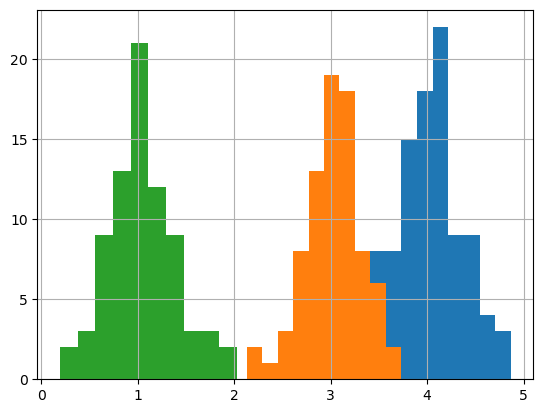

In [65]:
# First lets define some data. In this case 3 Gaussians
means = [1]*77 + [3]*80 + [4]*99
objects = ['red']*77 + ['green']*80 + ['blue']*99
errors = np.random.rand(len(means))*0.2 + 0.2 # errors are between 0.2 and 0.4
values = np.random.normal(means, errors)

data_dict = {'value': values, 'error': errors, 'object': objects}
df_gauss = pd.DataFrame(data_dict)
df_gauss
df_gauss.groupby('object')['value'].hist()

object
green    Axes(0.125,0.11;0.775x0.77)
red      Axes(0.125,0.11;0.775x0.77)
Name: value, dtype: object

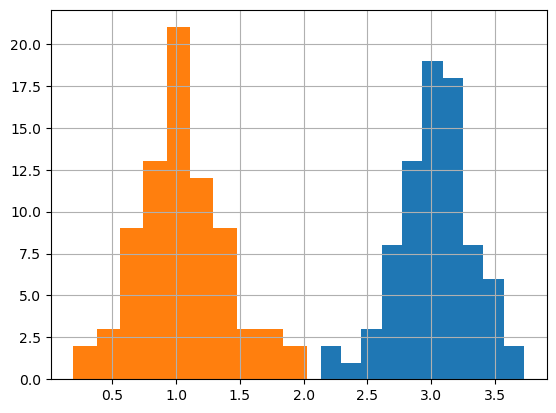

In [66]:
# now discard all Gaussians where the mean is above 3.5 
def my_filter(x):
    mean = x['value'].mean()
    return mean < 3.5
    
df_gauss_cut = df_gauss.groupby('object').filter(my_filter)
df_gauss_cut.groupby('object')['value'].hist()

### Transformazioni

Possiamo anche applicare una funzione a ciascun valore di un gruppo specifico.

object
blue     Axes(0.125,0.11;0.775x0.77)
green    Axes(0.125,0.11;0.775x0.77)
red      Axes(0.125,0.11;0.775x0.77)
Name: normalized value, dtype: object

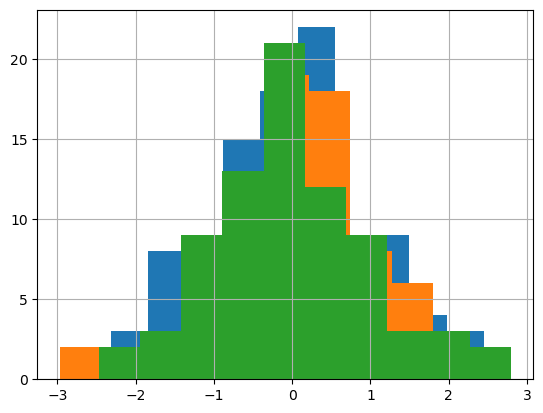

In [67]:
# let's normalize all our data, we need to do this for each Gaussian
df_gauss['normalized value'] = df_gauss.groupby('object')['value'].transform(lambda x: (x - x.mean())/x.std())
df_gauss.groupby('object')['normalized value'].hist()

### Different Group-By keys

Possiamo avere selezioni group-by più complesse.






In [68]:
# group by detection method, as well as the decade in which the detection was made
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Esercizio 


Graficare il file Nemo_6670.dat plottando la magnitudine assoluta (M_ass) in funzione del colore (b-y) in diversi bin di eta' delle stelle: age_parent

## Time-Series Data

https://github.com/jakevdp/PythonDataScienceHandbook

In [69]:
# read in the Seattle Fremont Bridge data - it counts bicylcles 
# going east/west. There is one data entry for each hour

# download if you dont have the data set yet
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3271k    0 3271k    0     0   994k      0 --:--:--  0:00:03 --:--:--  999k


/tmp/ipykernel_49889/648754675.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


In [70]:
# the file contains a time stamp, as well as the number of persons going east and west
data.head(n=10)

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0
2012-10-02 18:00:00,381.0,236.0,145.0
2012-10-02 19:00:00,175.0,104.0,71.0
2012-10-02 20:00:00,86.0,51.0,35.0
2012-10-02 21:00:00,63.0,35.0,28.0


In [71]:
data = data.drop('Fremont Bridge Sidewalks, south of N 34th St',axis=1)
data.head(n=10)


,"Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,
2012-10-02 13:00:00,7.0,48.0
2012-10-02 14:00:00,55.0,75.0
2012-10-02 15:00:00,81.0,71.0
2012-10-02 16:00:00,167.0,111.0
2012-10-02 17:00:00,393.0,170.0
2012-10-02 18:00:00,236.0,145.0
2012-10-02 19:00:00,104.0,71.0
2012-10-02 20:00:00,51.0,35.0
2012-10-02 21:00:00,35.0,28.0


<Axes: xlabel='Date'>

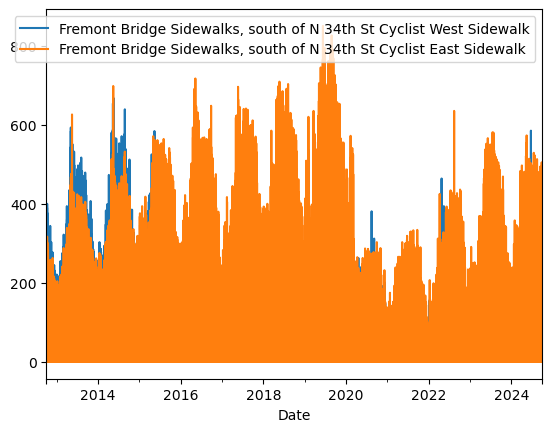

In [72]:
# let's take a look at the data as it is
data.plot()

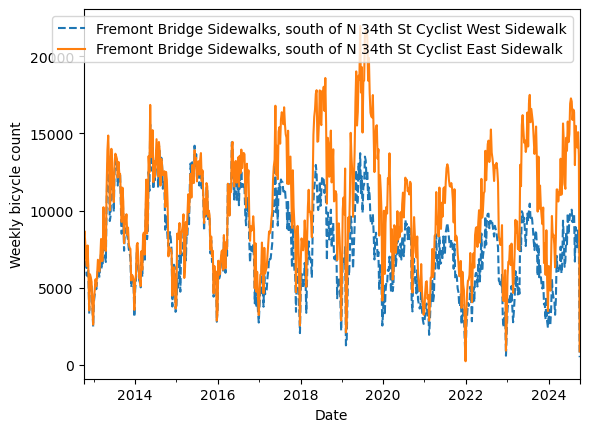

In [73]:
# for a slightly cleaner view
weekly = data.resample('W').sum() # 'W' is for weekly
weekly.plot(style=['--', '-'])
plt.ylabel('Weekly bicycle count');


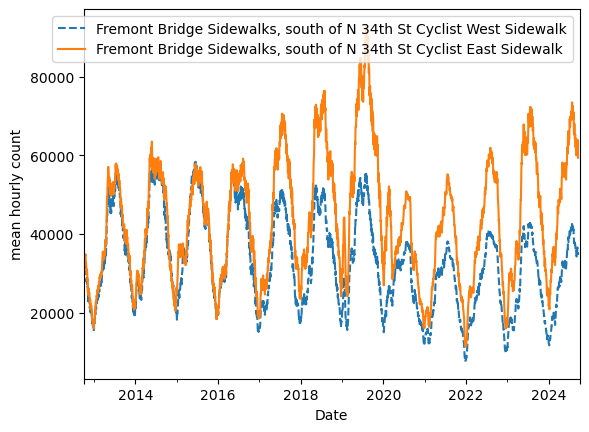

In [74]:
# it's still a bit noisy, maybe let's try a 30day rolling window
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['--', '-'])
plt.ylabel('mean hourly count');


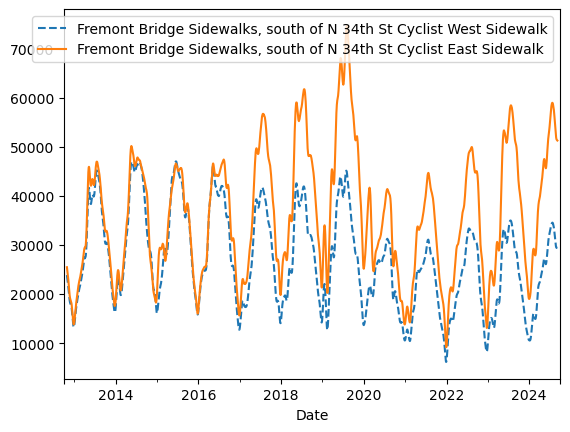

In [75]:
# still a bit wiggly, maybe use a larger window and use a Gaussian instead of a tophat
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['--', '-']);


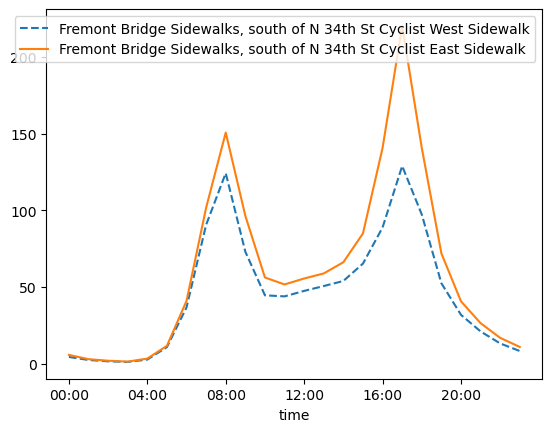

In [76]:
# let's see if there are any peaks during the day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['--', '-']);


In [77]:
# we can also ask for the day of the week for each entry
data.index.weekday

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='Date', length=105144)

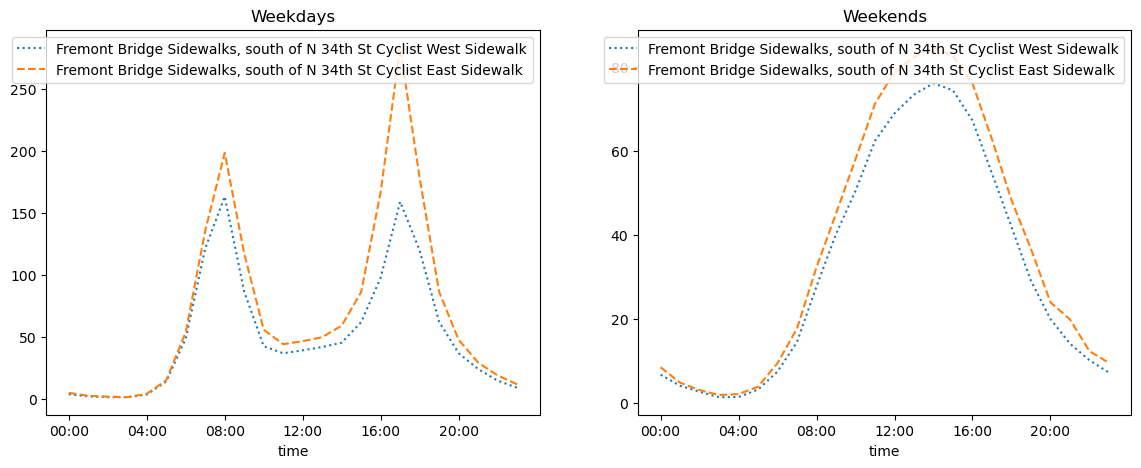

In [78]:
# that way we can see if bicycle traffic is different for 
# weekdays and weekends
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

# Esercizio 

Leggere il database dei contagi COVID19 dal repository della Protezione Civile:
https://github.com/pcm-dpc/COVID-19/blob/master/dati-regioni/dpc-covid19-ita-regioni.csv

Graficare l'andamento delle variabili per una regione a scelta

## Violin Plots

Sebbene ciò non sia strettamente una funzionalità di Pandas, è veramente molto semplice realizzare un violin plot con Pandas e Seaborn. Lo stesso risultato può essere ottenuto anche con numpy e seaborn, ma è più complicato.

Un violin plot combina le caratteristiche di un box plot e di un kernel density plot, offrendo una visualizzazione dettagliata della distribuzione dei dati attraverso diverse categorie. Mentre con numpy dovresti gestire manualmente la preparazione dei dati per la visualizzazione, con Pandas puoi semplicemente passare un DataFrame a Seaborn e lasciare che si occupi del resto.

Ecco un esempio su come creare un violin plot utilizzando Pandas e Seaborn:

In [79]:
# load the data set about tipping in the US
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/Users/saro/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='tip'>

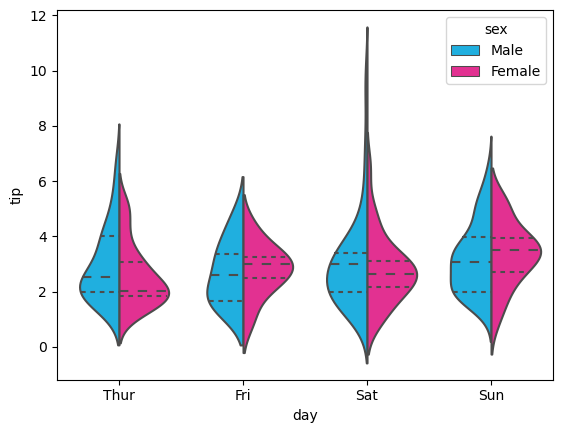

In [80]:
# now with seaborn and pandas it's very easy to see if tipping
# behavior depends on the sex and if there is a weekday variation
sns.violinplot(x="day", y="tip", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "DeepSkyBlue", "Female": "DeepPink"})

In [83]:
df = pd.read_table('../Nemo_6670.dat', sep=' ', comment='#', header=None)
df.columns = ["MsuH", "m_ini", "logL", "logTe", "M_ass", "b_ass", "y_ass", "m_app", "b-y", "dist", "abs_dist", "ID_parent", "age_parent"]
df

,MsuH,m_ini,logL,logTe,M_ass,b_ass,y_ass,m_app,b-y,dist,abs_dist,ID_parent,age_parent
0,0.28,2.31633,1.696,3.8475,0.450,0.659,0.433,6.377450,0.271987,143.4808,143.4808,4.222250e+09,0.742048
1,0.44,2.16245,1.468,3.8049,1.050,1.361,1.032,3.638197,0.339399,32.4452,32.4452,3.150372e+09,1.010928
2,0.51,0.96579,-0.332,3.7154,5.773,6.274,5.738,5.667350,0.539040,9.4836,9.4836,4.223612e+09,0.051529
3,-0.10,1.01151,0.085,3.7798,4.595,4.951,4.575,5.820310,0.381590,17.4411,17.4411,3.148632e+09,3.687081
4,-0.45,0.95608,0.192,3.7971,4.337,4.657,4.319,3.440032,0.340114,-6.5961,6.5961,1.002465e+09,4.605646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,-0.10,0.67467,-0.845,3.6474,7.443,8.054,7.379,3.810229,0.675601,1.8753,1.8753,1.001470e+09,3.256766
6666,-0.04,0.81052,-0.507,3.7043,6.261,6.754,6.225,6.666521,0.532842,11.9869,11.9869,3.147767e+09,1.373838
6667,-0.86,0.61714,-0.806,3.6866,7.091,7.603,7.057,6.231809,0.548151,-6.7115,6.7115,1.002345e+09,1.194399
6668,0.40,2.58142,1.788,3.9247,0.255,0.303,0.239,4.432170,0.085281,-66.3979,66.3979,4.224205e+09,0.588452


/tmp/ipykernel_49889/320875640.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', Nbins)
/tmp/ipykernel_49889/320875640.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (bin_value, group) in enumerate(df.groupby(bins)):


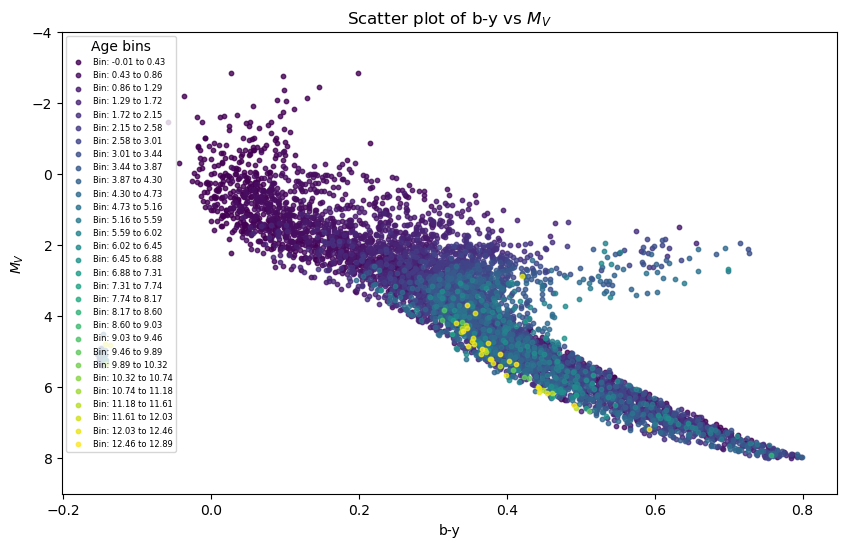

In [84]:
df = pd.read_table('../Nemo_6670.dat', sep=' ', comment='#', header=None)
df.columns = ["MsuH", "m_ini", "logL", "logTe", "M_ass", "b_ass", "y_ass", "m_app", "b-y", "dist", "abs_dist", "ID_parent", "age_parent"]

Nbins = 30
bins = pd.cut(df['age_parent'], bins=Nbins)

plt.figure(figsize=(10, 6))
cmap = plt.cm.get_cmap('viridis', Nbins)  
marker_size = 10  
for i, (bin_value, group) in enumerate(df.groupby(bins)):
    color = cmap(i / (Nbins - 1))  # Calcola i colori dalla colormap
    plt.scatter(group['b-y'], group['M_ass'], 
                label=f'Bin: {bin_value.left:.2f} to {bin_value.right:.2f}', 
                color=color, s=marker_size, alpha=0.8)

plt.ylim(9, -4)
plt.xlabel('b-y')
plt.ylabel('$M_V$')
plt.title('Scatter plot of b-y vs $M_V$')
plt.legend(loc='best', title='Age bins', fontsize='6')
plt.show()


In [85]:
df

,MsuH,m_ini,logL,logTe,M_ass,b_ass,y_ass,m_app,b-y,dist,abs_dist,ID_parent,age_parent
0,0.28,2.31633,1.696,3.8475,0.450,0.659,0.433,6.377450,0.271987,143.4808,143.4808,4.222250e+09,0.742048
1,0.44,2.16245,1.468,3.8049,1.050,1.361,1.032,3.638197,0.339399,32.4452,32.4452,3.150372e+09,1.010928
2,0.51,0.96579,-0.332,3.7154,5.773,6.274,5.738,5.667350,0.539040,9.4836,9.4836,4.223612e+09,0.051529
3,-0.10,1.01151,0.085,3.7798,4.595,4.951,4.575,5.820310,0.381590,17.4411,17.4411,3.148632e+09,3.687081
4,-0.45,0.95608,0.192,3.7971,4.337,4.657,4.319,3.440032,0.340114,-6.5961,6.5961,1.002465e+09,4.605646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,-0.10,0.67467,-0.845,3.6474,7.443,8.054,7.379,3.810229,0.675601,1.8753,1.8753,1.001470e+09,3.256766
6666,-0.04,0.81052,-0.507,3.7043,6.261,6.754,6.225,6.666521,0.532842,11.9869,11.9869,3.147767e+09,1.373838
6667,-0.86,0.61714,-0.806,3.6866,7.091,7.603,7.057,6.231809,0.548151,-6.7115,6.7115,1.002345e+09,1.194399
6668,0.40,2.58142,1.788,3.9247,0.255,0.303,0.239,4.432170,0.085281,-66.3979,66.3979,4.224205e+09,0.588452
